In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import weibull_min


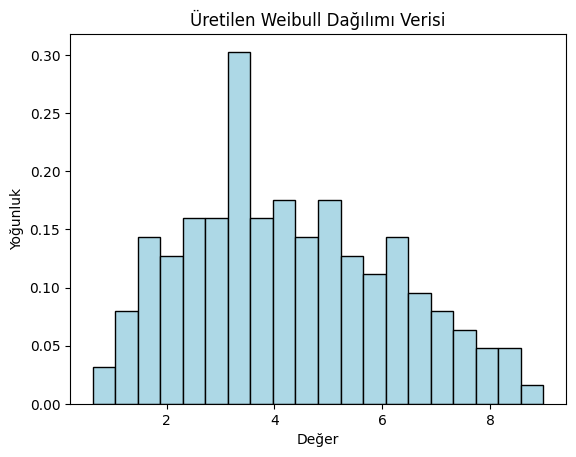

In [2]:
np.random.seed(42)

true_k = 2.5   # şekil parametresi (shape)
true_l = 5.0   # ölçek parametresi (scale)
n = 150        # gözlem sayısı

data = weibull_min.rvs(true_k, scale=true_l, size=n)

plt.hist(data, bins=20, density=True, color="lightblue", edgecolor="black")
plt.title("Üretilen Weibull Dağılımı Verisi")
plt.xlabel("Değer")
plt.ylabel("Yoğunluk")
plt.show()


In [3]:
def log_likelihood(params):
    k, l = params
    if k <= 0 or l <= 0:
        return -np.inf  # geçersiz değerleri engelle
    n = len(data)
    return np.sum(np.log(k/l) + (k-1)*np.log(data/l) - (data/l)**k)


In [4]:
def jaya_weibull(max_iter=100, pop_size=20):
    # Rastgele başlangıç (k, l)
    population = np.random.uniform(low=[0.5, 1.0], high=[5.0, 10.0], size=(pop_size, 2))

    best_per_iter = []
    for t in range(max_iter):
        fitness = np.array([log_likelihood(ind) for ind in population])
        best = population[np.argmax(fitness)]
        worst = population[np.argmin(fitness)]

        # Güncelleme kuralı (Jaya mantığı)
        for i in range(pop_size):
            r1, r2 = np.random.rand(2)
            new_ind = population[i] + r1*(best - abs(population[i])) - r2*(worst - abs(population[i]))
            new_fit = log_likelihood(new_ind)

            if new_fit > fitness[i]:
                population[i] = new_ind
                fitness[i] = new_fit

        best_fit = np.max(fitness)
        best_ind = population[np.argmax(fitness)]
        best_per_iter.append(best_fit)

        if t % 10 == 0:
            print(f"Iter {t}: En iyi log-likelihood = {best_fit:.2f}")

    return best_ind, best_fit, best_per_iter


Iter 0: En iyi log-likelihood = -310.13
Iter 10: En iyi log-likelihood = -304.01
Iter 20: En iyi log-likelihood = -303.98
Iter 30: En iyi log-likelihood = -303.98
Iter 40: En iyi log-likelihood = -303.98
Iter 50: En iyi log-likelihood = -303.98
Iter 60: En iyi log-likelihood = -303.98
Iter 70: En iyi log-likelihood = -303.98
Iter 80: En iyi log-likelihood = -303.98
Iter 90: En iyi log-likelihood = -303.98

Tahmini Parametreler (k, λ): [2.42323074 4.81594541]
En iyi log-likelihood: -303.98169530782286


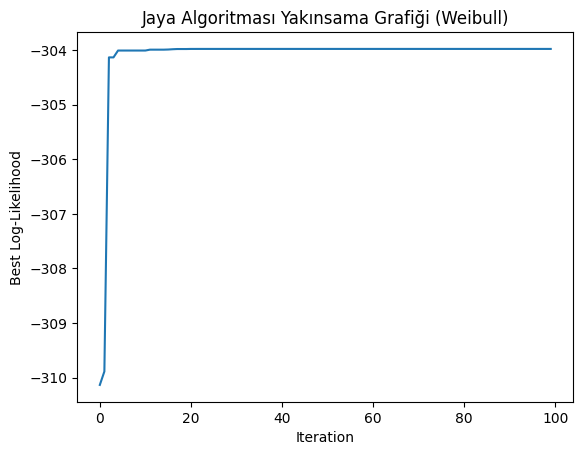

In [5]:
best_params, best_fit, best_per_iter = jaya_weibull()

print("\nTahmini Parametreler (k, λ):", best_params)
print("En iyi log-likelihood:", best_fit)

plt.plot(best_per_iter)
plt.xlabel("Iteration")
plt.ylabel("Best Log-Likelihood")
plt.title("Jaya Algoritması Yakınsama Grafiği (Weibull)")
plt.show()
